<a href="https://colab.research.google.com/github/nehadubey1205/ResearchWork/blob/main/New_Approach_HateandBullySent_5may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
data = pd.read_csv('/content/combined_file_New.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



# count the frequency of each label
label_counts = data['Bully_Label'].value_counts()

In [5]:
label_counts

0        4164
1        3050
label       1
Name: Bully_Label, dtype: int64

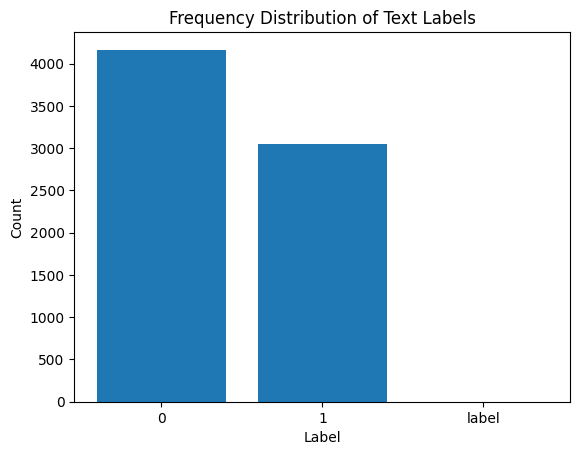

In [4]:


# plot the frequency distribution
plt.bar(label_counts.index, label_counts.values)
plt.title('Frequency Distribution of Text Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/combined_file_New.csv')

In [ ]:
data.tail(2)

,Processed_Tweets,Bully_Label
7213,It should be clear that british insaan nahi hai,0
7214,It should be clear that samalaingik logon insa...,0


In [ ]:
# Print the first three rows of the DataFrame
data.iloc[5900:6200]

,Processed_Tweets,Bully_Label
5900,Tune apni gf ko marne ka bola tha Mujhe kya pa...,0
5901,"Coronavirus is the only ""Chinese maal"" that la...",1
5902,Hamid Mir it is % sure hay to Kisi kuti maa Ka...,1
5903,Greetings from ISKCONHabibpurToday's Special D...,0
5904,Don't u have got any work to do rather than sp...,1
...,...,...
6195,Hinduon se bura kuch nahi hai.,0
6196,Musalamaanon se bura kuch nahi hai.,0
6197,Bangladeshiyon se bura kuch nahi hai.,0
6198,Pakistaniyon se bura kuch nahi hai.,0


In [ ]:
# we want to remove 6084
data= data.drop(index=[6084])

In [ ]:
data.isnull().sum()

Processed_Tweets    0
Bully_Label         0
dtype: int64

In [ ]:
data.shape

(7214, 2)

LSTM

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
#from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:

pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 128.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
     


from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = data['Processed_Tweets'].values
y = data['Bully_Label'].values
     

from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
     


X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Creating the deep learning model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
#from keras.callbacks import EarlyStopping
#from keras.utils import to_categorical

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=64, validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01)])

Epoch 1/10
82/82 [==============================] - 28s 270ms/step - loss: 0.4753 - accuracy: 0.7585 - val_loss: 0.3441 - val_accuracy: 0.8376
Epoch 2/10
82/82 [==============================] - 33s 396ms/step - loss: 0.2458 - accuracy: 0.8991 - val_loss: 0.3514 - val_accuracy: 0.8383
Epoch 3/10
82/82 [==============================] - 22s 267ms/step - loss: 0.1544 - accuracy: 0.9395 - val_loss: 0.4156 - val_accuracy: 0.8345
Epoch 4/10
82/82 [==============================] - 22s 263ms/step - loss: 0.0987 - accuracy: 0.9634 - val_loss: 0.5662 - val_accuracy: 0.8268


In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

23/23 [==============================] - 1s 43ms/step


In [ ]:
# Evaluating the performance of the model

accuracy = accuracy_score(y_test, y_predict)

TypeError: ignored

In [ ]:

precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
     

#print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LSTM -2 **LSTM second Methode**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the dataset
df = pd.read_csv("/content/combined_file_New.csv")

In [ ]:
df.tail()

,Processed_Tweets,Bully_Label
7210,It should be clear that daliton insaan nahi hai,0
7211,It should be clear that mahilaon insaan nahi hai,0
7212,It should be clear that nichli jaati ke logon ...,0
7213,It should be clear that british insaan nahi hai,0
7214,It should be clear that samalaingik logon insa...,0


In [ ]:
df= df.drop(index=[6084])

In [ ]:
# Remove unwanted columns and clean the text
df = df[['Processed_Tweets', 'Bully_Label']]
df['Processed_Tweets'] = df['Processed_Tweets'].apply(lambda x: re.sub(r'http\S+', '', x))
df['Processed_Tweets'] = df['Processed_Tweets'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
df['Processed_Tweets'] = df['Processed_Tweets'].apply(lambda x: x.lower())

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Remove stop words
stop_words = set(stopwords.words('english'))
train_df['Processed_Tweets'] = train_df['Processed_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_df['Processed_Tweets'] = test_df['Processed_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
# Convert the labels to numerical values
train_df['Bully_Label'] = train_df['Bully_Label'].astype('category').cat.codes
test_df['Bully_Label'] = test_df['Bully_Label'].astype('category').cat.codes


In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_df['Processed_Tweets'])

# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(test_df['Processed_Tweets'])

In [ ]:
# Convert the labels to numpy arrays
y_train = np.array(train_df['Bully_Label'])
y_test = np.array(test_df['Bully_Label'])

In [ ]:
# Convert the text data to sequences of integers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Processed_Tweets'])

X_train_seq = tokenizer.texts_to_sequences(train_df['Processed_Tweets'])
X_test_seq = tokenizer.texts_to_sequences(test_df['Processed_Tweets'])

# Pad the sequences to a fixed length
X_train_seq = pad_sequences(X_train_seq, maxlen=500)
X_test_seq = pad_sequences(X_test_seq, maxlen=500)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=500))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# Train the model
model.fit(X_train_seq, y_train, batch_size=32, epochs=10, validation_data=(X_test_seq, y_test))


Epoch 1/10
181/181 [==============================] - 169s 902ms/step - loss: 0.4559 - accuracy: 0.7685 - val_loss: 0.3374 - val_accuracy: 0.8579
Epoch 2/10
181/181 [==============================] - 164s 903ms/step - loss: 0.2504 - accuracy: 0.8986 - val_loss: 0.3602 - val_accuracy: 0.8482
Epoch 3/10
181/181 [==============================] - 167s 923ms/step - loss: 0.1705 - accuracy: 0.9371 - val_loss: 0.3801 - val_accuracy: 0.8524
Epoch 4/10
181/181 [==============================] - 163s 900ms/step - loss: 0.1128 - accuracy: 0.9624 - val_loss: 0.4768 - val_accuracy: 0.8337
Epoch 5/10
181/181 [==============================] - 162s 893ms/step - loss: 0.0873 - accuracy: 0.9711 - val_loss: 0.5810 - val_accuracy: 0.8274
Epoch 6/10
181/181 [==============================] - 163s 899ms/step - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.6194 - val_accuracy: 0.8247
Epoch 7/10
181/181 [==============================] - 167s 922ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 0.6261 -

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test accuracy:", accuracy)


Test accuracy: 0.8135828375816345


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(X_test_seq)
y_pred = (y_pred > 0.5).astype(int)

# Print the precision, recall, and F1 score
print(classification_report(y_test, y_pred))


46/46 [==============================] - 7s 152ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       846
           1       0.77      0.78      0.78       597

    accuracy                           0.81      1443
   macro avg       0.81      0.81      0.81      1443
weighted avg       0.81      0.81      0.81      1443



Voting Classifiers

In [ ]:
df = pd.read_csv('/content/combined_file_New.csv')

In [ ]:
# we want to remove 6084
df= df.drop(index=[6084])

In [ ]:
df.tail(2)

,Processed_Tweets,Bully_Label
7213,It should be clear that british insaan nahi hai,0
7214,It should be clear that samalaingik logon insa...,0


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:


import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.corpus import stopwords

# Download Hinglish stop words
nltk.download('stopwords-indian')
     

nltk.download('stopwords')

[nltk_data] Error loading stopwords-indian: Package 'stopwords-indian'
[nltk_data]     not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocessing the dataset
vectorizer = TfidfVectorizer(stop_words='english')
     

X = vectorizer.fit_transform(df['Processed_Tweets'])
y = df['Bully_Label']

In [ ]:
# Creating base models
model1 = DecisionTreeClassifier()
model2 = SVC(kernel='linear', probability=True)
model3 = MultinomialNB()

In [ ]:
# Creating an ensemble model
ensemble = VotingClassifier(estimators=[('dt', model1), ('svm', model2), ('nb', model3)], voting='soft')

# Training the ensemble model
ensemble.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [ ]:
# Evaluating the performance of the model
y_pred = ensemble.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.990435264762961
Precision: 0.9904652816810925
Recall: 0.990435264762961
F1-score: 0.9904399845417385
